# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv(r'C:\Users\jvict\OneDrive\Documentos\EBACCIENTISTA\df_learn.csv')

In [7]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(16650, 29)
(6770, 29)


In [8]:
df.reset_index(drop=True, inplace=True)

In [12]:
y = df.mau
X = df.drop('mau',axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [50]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

In [51]:
predict_clf = clf.predict(X_test)
accuracy_score(y_test,predict_clf)

0.9172821270310192

[Text(0.6558591508035202, 0.9814814814814815, 'tempo_emprego <= 4.955\ngini = 0.085\nsamples = 4739\nvalue = [4528, 211]'),
 Text(0.4040095298450354, 0.9444444444444444, 'tempo_emprego <= 4.949\ngini = 0.099\nsamples = 2594\nvalue = [2458, 136]'),
 Text(0.5299343403242778, 0.962962962962963, 'True  '),
 Text(0.400948500573943, 0.9074074074074074, 'posse_de_imovel <= 0.5\ngini = 0.099\nsamples = 2592\nvalue = [2457, 135]'),
 Text(0.2700043045724125, 0.8703703703703703, 'estado_civil_Widow <= 0.5\ngini = 0.128\nsamples = 815\nvalue = [759.0, 56.0]'),
 Text(0.23696671130667687, 0.8333333333333334, 'tempo_emprego <= 4.647\ngini = 0.117\nsamples = 770\nvalue = [722, 48]'),
 Text(0.21221541993495313, 0.7962962962962963, 'tipo_residencia_Municipal apartment <= 0.5\ngini = 0.108\nsamples = 733\nvalue = [691, 42]'),
 Text(0.18414004208915247, 0.7592592592592593, 'tipo_residencia_Office apartment <= 0.5\ngini = 0.099\nsamples = 688\nvalue = [652, 36]'),
 Text(0.1524775205662904, 0.72222222222222

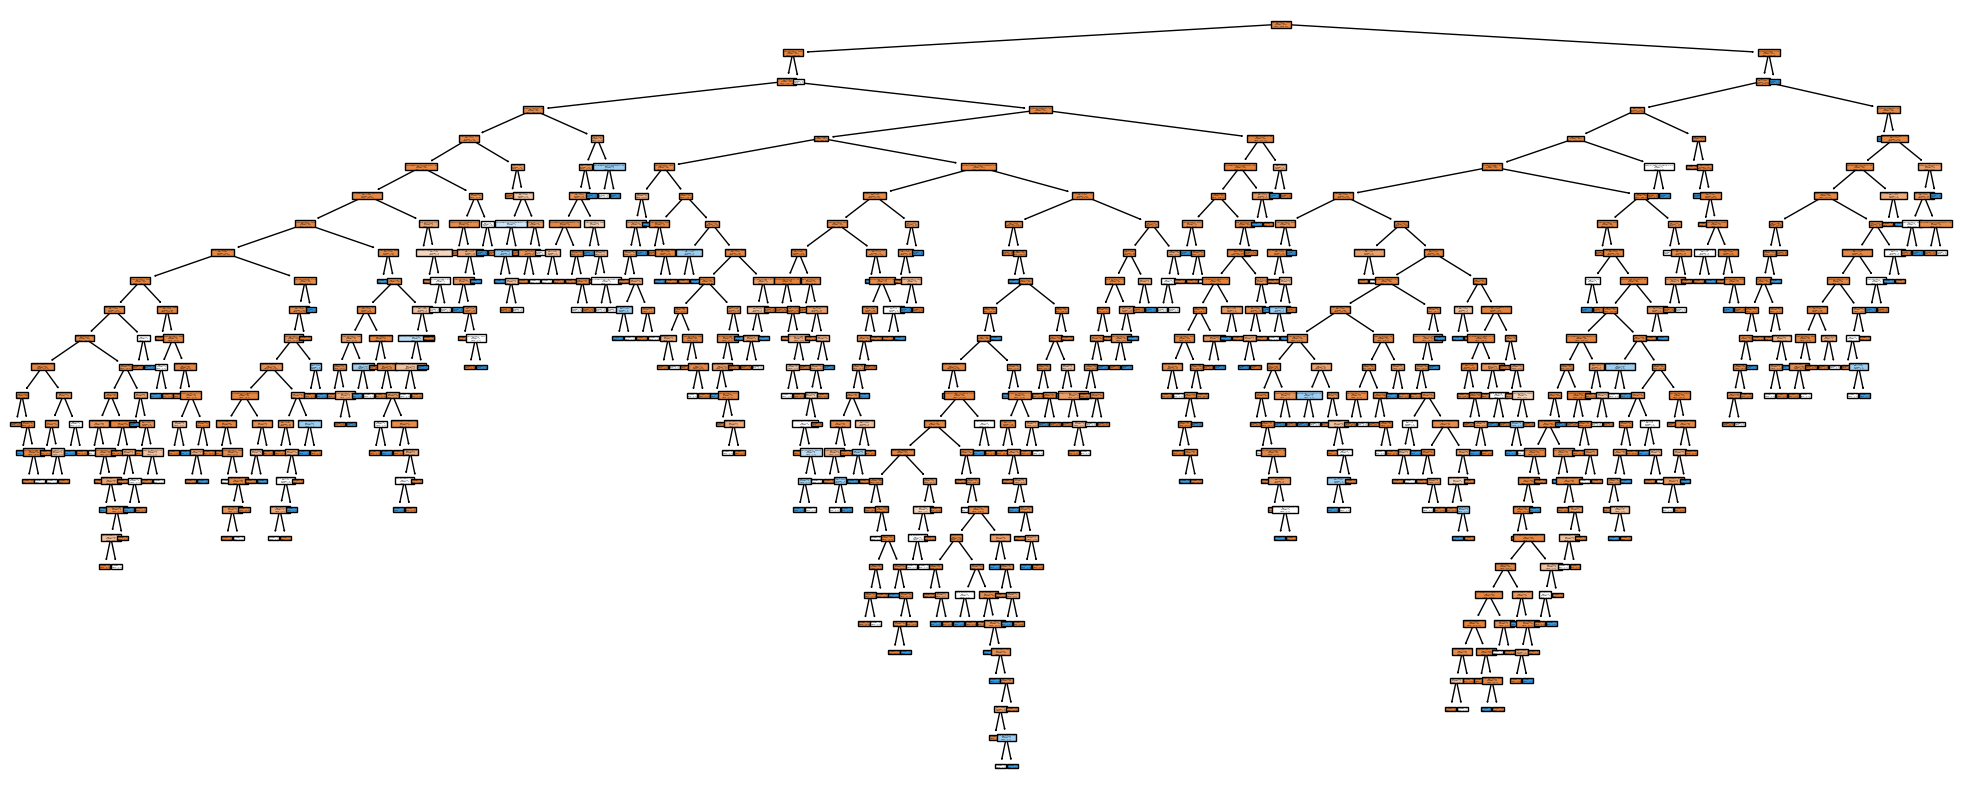

In [52]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          feature_names=X.columns)

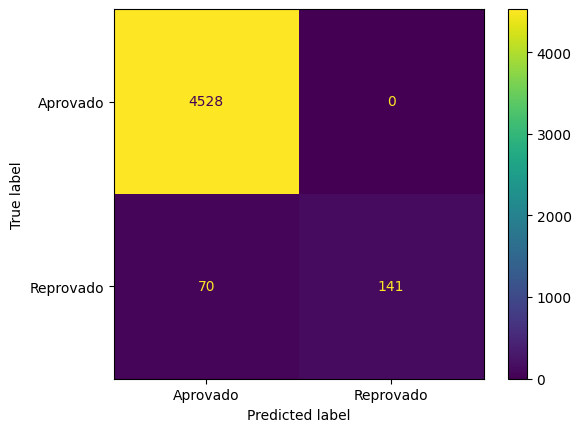

In [59]:
predict = clf.predict(X_train)
cm = confusion_matrix(y_train,predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Aprovado','Reprovado'])
disp.plot()
plt.show()

In [61]:
accuracy_score(y_train,predict)

0.9852289512555391

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [ ]:
clf_test = DecisionTreeClassifier(random_state=100)
clf_test = clf_test.fit(X_test,y_test)

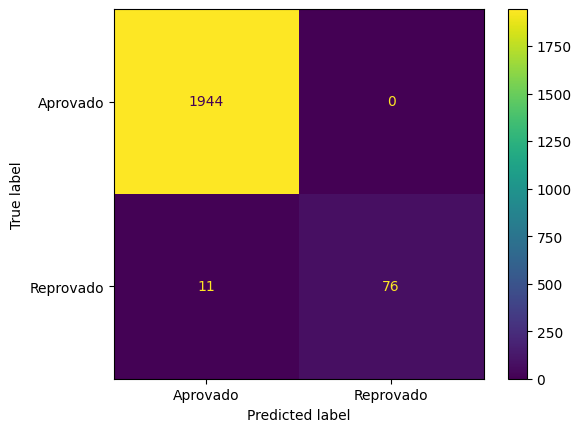

In [62]:
predict1 = clf_test.predict(X_test)
cm = confusion_matrix(y_test,predict1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Aprovado','Reprovado'])
disp.plot()
plt.show()

In [63]:
print(f'Acurácia do teste: {accuracy_score(y_test,predict1)} \nAcurácia do treinamento: {accuracy_score(y_train,predict)}')

Acurácia do teste: 0.9945839487936977 
Acurácia do treinamento: 0.9852289512555391


In [68]:
clf_podada = DecisionTreeClassifier(random_state=123,min_samples_leaf=5,max_depth=10)
clf_podada = clf_podada.fit(X_train,y_train)
predict_podado = clf_podada.predict(X_test)
accuracy_score(y_test,predict_podado)

0.9537173806006893

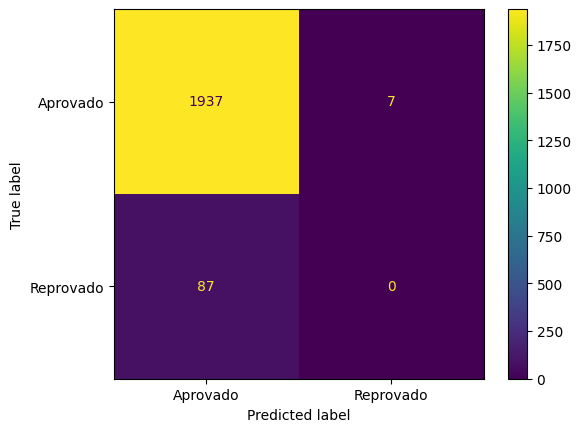

In [69]:
cm = confusion_matrix(y_test,predict_podado)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Aprovado','Reprovado'])
disp.plot()
plt.show()

In [70]:
df['bom'] = 1
y = df.bom
X = df.drop('bom',axis=1)

C:\Users\jvict\AppData\Local\Temp\ipykernel_9604\519605767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bom'] = 1


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [73]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)
predict_clf = clf.predict(X_test)
accuracy_score(y_test,predict_clf)

1.0